# <center><font color=green align="center"> Introduction to PyTorch</font></center>
# <center><font color=blue align="center"> Frameworks, GPU, Tensors and Operations </font></center>


(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr




Welcome to the practical section of the 3rd lecture on deep learning. <br>
This exercise is divided into 5 parts. Each part is accompanied by one `TODO` exercise.<br>
You also have an additional `Bonus` exercise if you finish very quickly.<br>

**Instructions**:
* Download "sample_images" folder at https://seafile.unistra.fr/d/4fbc31ff7ccc43239080/ and save your google drive folder (./datasets)
* Read all the descriptions and code.
* Run the pre-completed cells.
* Fill in the `TODO`blocks and run the code.
* Ensure you are connected to the internet for the notebook image rendering.
* Please ask questions if you have any doubts.

--------


## Part 1:  Introduction to Tensors

<img src="https://drive.google.com/uc?id=1OTDrP_bwN-JECQ02uRzxXxcomB0cYmpU" width="200" style="margin-right: 100px" align="left"/>


**Objectives**:

* 1) To use PyTorch framework and GPU devices 
* 2)  To create Tensors 
* 3) To inspect the properties of Tensors such as: data types, shapes, ranks and dimensions



<br>**Import PyTorch Frameworks and other libraries**

In [139]:
import torch
import os
import urllib
from zipfile import ZipFile

from matplotlib import pyplot as plt
import glob

import numpy as np
import pickle
import gzip

<br>**Check your PyTorch version and GPU**

In [140]:
# check the tensorflow version; should be greater than 2.0
print("PyTorch version: ", torch.__version__)

# check the GPU support; should be yes
print("Is GPU available ?: ", torch.cuda.is_available())

# check how many GPU(s) are present
print("How many GPU(s) ?", torch.cuda.device_count())

# get the information on the gpu:0
# device0 = torch.device('cuda:0')
# print("Infos :", torch.cuda.get_device_properties(device0))

PyTorch version:  1.13.1+cpu
Is GPU available ?:  False
How many GPU(s) ? 0


<br><br>**Creating Tenors**
- create constant tensor of value 5.0
- create a vector tensor with sequential values ranging from 2 to 9
- create a 3x4 matrix tensor with zero values.
- inpect all their properties (such as:  shape, data type, dimension, rank, etc.)
- print their numpy values

In [141]:
a = torch.tensor(5.0, dtype=torch.float64)
print(a)

tensor(5., dtype=torch.float64)


In [142]:
b = torch.arange(2,10, dtype=torch.int64)
print(b)

tensor([2, 3, 4, 5, 6, 7, 8, 9])


In [143]:
c = torch.zeros((3,4), dtype=torch.int32)
print(c)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [144]:
print("Tensor A has a shape of ", (a.shape), ". Its data type is ", (a.dtype) ,". It is a ", len(a.shape),"-D tensor.","\n", "-"*30)
print("Tensor B has a shape of ", (b.shape), ". Its data type is ", (b.dtype) ,". It is a ", len(b.shape),"-D tensor.","\n", "-"*30)
print("Tensor C has a shape of ", (c.shape), ". Its data type is ", (c.dtype) ,". It is a ", len(c.shape),"-D tensor.","\n", "-"*30)


Tensor A has a shape of  torch.Size([]) . Its data type is  torch.float64 . It is a  0 -D tensor. 
 ------------------------------
Tensor B has a shape of  torch.Size([8]) . Its data type is  torch.int64 . It is a  1 -D tensor. 
 ------------------------------
Tensor C has a shape of  torch.Size([3, 4]) . Its data type is  torch.int32 . It is a  2 -D tensor. 
 ------------------------------


In [145]:
print(" A = ", a.numpy(),"\n", "-"*30)
print(" B = ", b.numpy(),"\n", "-"*30)
print(" C = \n", c.numpy(),"\n", "-"*30)

 A =  5.0 
 ------------------------------
 B =  [2 3 4 5 6 7 8 9] 
 ------------------------------
 C = 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 
 ------------------------------


#### <font color=red> <br><br><u><b>TODO</b></u> 1:</font>
![alttext](https://drive.google.com/uc?id=11u8_8XXjFkqFPVtSS4Q7PW_S3ZxppLaD)
- Generate the tensor in the figure. 
- Generate also a 5x2 tensors with gaussian distributed values.
- Finally, generate a boolean list (1,1,0,1,0).
- Display their numpy values to confirm.
- Inspect the shape and data type of the generated tensors.

In [146]:
# Tensor in the figure
a = torch.tensor([[5.2,7.5],[4.2,5.7]], dtype=torch.float32)
print(a)

tensor([[5.2000, 7.5000],
        [4.2000, 5.7000]])


In [147]:
# 5x2 random value tensor
b = torch.normal(0, 1, size=(5, 2))
print(b)

tensor([[-0.0671,  1.0562],
        [-0.9742,  0.1864],
        [-0.7048, -0.1352],
        [ 1.7035, -0.6594],
        [ 0.5074, -0.2139]])


In [148]:
# Boolean tensor with values (1,1,0,1,0)
c = torch.tensor([1,1,0,1,0], dtype=torch.bool)
print(c)

tensor([ True,  True, False,  True, False])


In [149]:
# Tensor values
print("a.numpy() = \n", a.numpy())
print("b.numpy() = \n", b.numpy())
print("c.numpy() = \n", c.numpy())

a.numpy() = 
 [[5.2 7.5]
 [4.2 5.7]]
b.numpy() = 
 [[-0.06705768  1.0562044 ]
 [-0.974178    0.18640165]
 [-0.704807   -0.1351607 ]
 [ 1.7034825  -0.65944934]
 [ 0.5073829  -0.21393539]]
c.numpy() = 
 [ True  True False  True False]


In [150]:
# Tensor properties
print("b.shape() = ", b.shape, " and b.dtype() = ", b.dtype)
print("c.shape() = ", c.shape, " and b.dtype() = ", c.dtype)
print("a.shape() = ", a.shape, " and b.dtype() = ", a.dtype)

b.shape() =  torch.Size([5, 2])  and b.dtype() =  torch.float32
c.shape() =  torch.Size([5])  and b.dtype() =  torch.bool
a.shape() =  torch.Size([2, 2])  and b.dtype() =  torch.float32


<br><hr />

## Part 2: Tensor Operations

<img src="https://developer.nvidia.com/blog/wp-content/uploads/2019/01/Tensor-Core-Matrix.png" width="500"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To modify the properties of tensors
- 2) To query tensors values and properties
- 3) To manipulate the values of tenosrs




<br><br>**Tensor modification**
- Generate a 1D tensor with a sequential values ranging from 0 to 19 and print the values.
- Reshape it to 4x5 matrix tensors and inspect the shape and values
- Convert to a float tensor and inspect the data type.
- Duplicate the tensor and concatenate them side by side and inspect their shapes.


In [151]:
a = torch.arange(20, dtype=torch.int64)  # if start == 0 and the delta ==1, then you don't need to specify start, and delta.

print(" Shape A = ", a.shape)
print("------------------------------------------------------------------")
print(" Value A = \n", a.numpy())

 Shape A =  torch.Size([20])
------------------------------------------------------------------
 Value A = 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [152]:
b = torch.reshape(a, shape=(4,5))

print(" Shape B = ", b.shape)
print("------------------------------------------------------------------")
print(" Value B = \n", b.numpy())

 Shape B =  torch.Size([4, 5])
------------------------------------------------------------------
 Value B = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [153]:
c = b.to(dtype=torch.float64)

print(" Type B = ", b.dtype, " but Type C = ", c.dtype)

 Type B =  torch.int64  but Type C =  torch.float64


In [154]:
d = torch.clone(c)
e = torch.cat((c,d), axis=1)


print(" Shape D = ", d.shape)
print(" Shape E = ", e.shape)
print("------------------------------------------------------------------")
print(" Value E = \n", e.numpy())

 Shape D =  torch.Size([4, 5])
 Shape E =  torch.Size([4, 10])
------------------------------------------------------------------
 Value E = 
 [[ 0.  1.  2.  3.  4.  0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19. 15. 16. 17. 18. 19.]]


**<br><br>Query Tensor**
Continuing with the concatenated tensor (e) in the previous exercise.
- Slice the tensor and display only the first column values.
- Slice the tensor and display only the last row values.
- Slice the tensor and display the values within column 2<sup>nd</sup> - 5<sup>th</sup> and row 1<sup>st</sup> - 3<sup>rd</sup>.
- Find the maximum values for each row.
- Find the average values for each column.
- Find the overall minimum value of the tensor.


In [155]:
e1 = e[:,0]
print(e1.numpy())

[ 0.  5. 10. 15.]


In [156]:
e2 = e[-1,:]
print(e2.numpy())

[15. 16. 17. 18. 19. 15. 16. 17. 18. 19.]


In [157]:
e3 = e[0:2, 1:4]
print(e3.numpy())

[[1. 2. 3.]
 [6. 7. 8.]]


In [158]:
e4 = torch.max(e, axis=1)
print(e4, "\n", '-'*20)
print(e4.values.numpy(), "\n", '-'*20)

torch.return_types.max(
values=tensor([ 4.,  9., 14., 19.], dtype=torch.float64),
indices=tensor([4, 4, 4, 4])) 
 --------------------
[ 4.  9. 14. 19.] 
 --------------------


In [159]:
e5 = torch.mean(e, axis=0)
print(e5.numpy())

[ 7.5  8.5  9.5 10.5 11.5  7.5  8.5  9.5 10.5 11.5]


In [160]:
e6 = torch.min(e)
print(e6.numpy())

0.0


**<br><br>Tensor Operations**

Let's implement the following algorithm:
- x = a 3x3 matrix tensor of random values.
- y = $ 2x^2 + 12$
- z = $\sqrt{y} - cos x$
- f = scale z between 0 and 1
- print the values.



In [161]:
x = torch.rand((3,3), dtype=torch.float32)

In [162]:
y = 2 * torch.pow(x,2) + 12.0

In [163]:
z = torch.sqrt(y) - torch.cos(x)

In [164]:
f = torch.sigmoid(z)

In [165]:
print("Value x = \n", x.numpy())
print("------------------------------------------------------------------")
print("Value y = \n", y.numpy())
print("------------------------------------------------------------------")
print("Value z = \n", z.numpy())
print("------------------------------------------------------------------")
print("Value f = \n", f.numpy())
print("------------------------------------------------------------------")

Value x = 
 [[0.5732194  0.36472315 0.65060335]
 [0.98164415 0.5137633  0.15559655]
 [0.26270032 0.57749057 0.9552731 ]]
------------------------------------------------------------------
Value y = 
 [[12.657161 12.266046 12.846569]
 [13.927251 12.527905 12.048421]
 [12.138023 12.66699  13.825093]]
------------------------------------------------------------------
Value z = 
 [[2.7175312 2.568069  2.7884927]
 [3.1762667 2.668577  2.4831643]
 [2.5182743 2.7212362 3.1408253]]
------------------------------------------------------------------
Value f = 
 [[0.93805325 0.92877805 0.94205076]
 [0.95993125 0.9351468  0.92295307]
 [0.925413   0.9382681  0.9585457 ]]
------------------------------------------------------------------


#### <font color=red><br><br><u><b>TODO</b></u> 2:</font>
- x = generate a 1D tensor of any length with random values. 
- x = | x * 100 | - 2.0
- check that:    $tan(x) = \frac{sin(x)}{cos(x)}$ .
- check that:    sin<sup> 2</sup>(x) + cos<sup>2</sup>(x) = 1 .
- print the values and cross check if your answers are correct all the time?

In [166]:
# Generate x
x = torch.normal(0.0, 2.0, size=(10,), dtype=torch.float64)
print(x)

tensor([ 2.5040,  0.7760, -0.1455,  4.0308,  0.6644, -1.1454, -1.5040,  0.3347,
        -0.0050,  0.2887], dtype=torch.float64)


In [167]:
# Absolute value
y = torch.abs(x * 100) - 2.0
print(y)

tensor([248.4048,  75.5983,  12.5480, 401.0824,  64.4422, 112.5418, 148.3967,
         31.4696,  -1.5046,  26.8696], dtype=torch.float64)


In [168]:
# proof 1
torch.tan(x) == torch.sin(x) / torch.cos(x)

tensor([ True, False,  True,  True, False,  True, False,  True,  True,  True])

In [169]:
# proof 2
torch.sin(x) ** 2 + torch.cos(x) ** 2 == 1 

tensor([ True, False,  True, False,  True,  True,  True, False,  True,  True])

<br><hr />

## Part 3: Functions and Derivatives

<img src="https://miro.medium.com/max/3040/1*q1M7LGiDTirwU-4LcFq7_Q.png" width="600" height="120"  style="margin-right: 100px" align="left"/>



**Objectives**:

- 1) To build a PyTorch function
- 2) To automatically differentiate PyTorch functions




<br><br>**Functions**

build the following TensorFlow functions:
- $y = 2x^2 + 12$
- $f(x, y) = x^3 + x^2y + xy^2 + y^3 + 0.3$

In [170]:
# define the function
def eqn1(x):
    return (2.0 * (x**2)) + 12.0


In [171]:
# define the function
def eqn2(x,y):
    return (x**3) + (x**2 * y) + (x * y**2) + (y**3) + 0.3


<br><br>**Derivatives**

Using `torch.autograde` to compute automatic differentiations of:
- $ \frac{dy}{dx} $ and solve for $x=5.0$.
- $ \frac{df(x,y)}{d_xd_y} $ and solve for $x=2.0,   y=3.0$.


In [172]:

# Given that x = 5.0
x = torch.tensor(5., requires_grad=True)

y = eqn1(x)
y.backward()

print("\nFunction ::: f = {} ".format(y.detach().numpy()))
print("\nGradient ::: gd = {} ".format(x.grad.numpy()))



Function ::: f = 62.0 

Gradient ::: gd = 20.0 


In [173]:

# Given that x=2 and y=3
x   = torch.tensor(2.0, requires_grad=True)
y   = torch.tensor(3.0, requires_grad=True)

f = eqn2(x,y)
f.backward()

print(f)
print(y.grad)
print(x.grad)

tensor(65.3000, grad_fn=<AddBackward0>)
tensor(43.)
tensor(33.)


In [174]:

# Given that x=2 and y=3
x   = torch.tensor(2.0, requires_grad=True)
y   = torch.tensor(3.0, requires_grad=True)


# Gradients
f = eqn2(x,y)
f.backward()

print("\nFunction  ::: f(x,y) = {}".format(f.detach().numpy()))
print("\nGradients ::: df/dx = {} and df/dy = {} ".format(x.grad.numpy(), y.grad.numpy()))



Function  ::: f(x,y) = 65.30000305175781

Gradients ::: df/dx = 33.0 and df/dy = 43.0 


#### <font color=red><br><br><u><b>TODO</b></u> 3:</font>

Given the function :
###  $g =  \frac{1}{1+e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

- Implement the function and find the gradients of all variables given that <br>: $w_0=4.0$ ,  $x_0=1.0$ ,  $w_1=2.0$ ,  $x_1=-1.0$ ,  $w_2=-3.0$.
- Compare your answer from the lecture 2.

In [175]:
# define function
def g(w0, w1, w2, x0, x1):
    return 1 / (1 + torch.exp(-(w0*x0 + w1*x1 + w2)))

In [176]:
# Define the given the values   
w0 = torch.tensor(4.0, requires_grad=True)
w1 = torch.tensor(2.0, requires_grad=True)
w2 = torch.tensor(-3.0, requires_grad=True)
x0 = torch.tensor(1.0, requires_grad=True)
x1 = torch.tensor(-1.0, requires_grad=True)

In [177]:
# Compute the gradients
y = g(w0, w1, w2, x0, x1)
y.backward()

In [178]:
# print the results
print("dw0 = ", w0.grad)
print("dw1 = ", w1.grad)
print("dw2 = ", w2.grad)
print("dx0 = ", x0.grad)
print("dx1 = ", x1.grad)

dw0 =  tensor(0.1966)
dw1 =  tensor(-0.1966)
dw2 =  tensor(0.1966)
dx0 =  tensor(0.7864)
dx1 =  tensor(0.3932)


<br>
<br>
<br><hr />

## Part 4: Image Manipulation

<img src="https://drive.google.com/uc?id=13Uwu2cUmk_j2OXtYSNxsQRig1PgE2Rk3" width="300" height="120"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To load and display images
- 2) To learn image to tensor conversion
- 3) To learn image processing
- 4) To learn image data augmentation




<br><br>**Download data**

Let's download the image dataset we will be using for this task.

In [179]:
# First, prepare the image
filepath = './sample_images/' # add your own path. Where to save the dataset

<br><br>**Loading and dispalying image data**

(442, 658, 3)


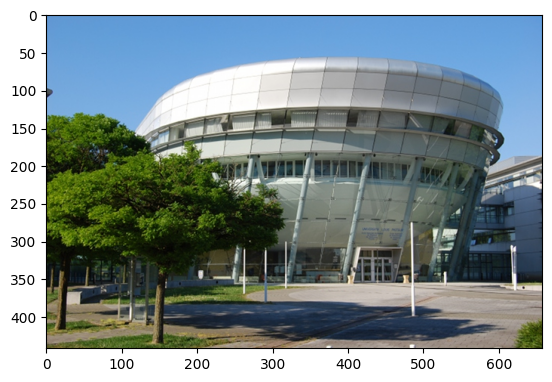

In [180]:
# read image file
icube_img = plt.imread(filepath+"icube.jpg")

# display image
plt.imshow(icube_img)

# check the image shape
print(icube_img.shape)

<br><br>**Convert image to tensor**

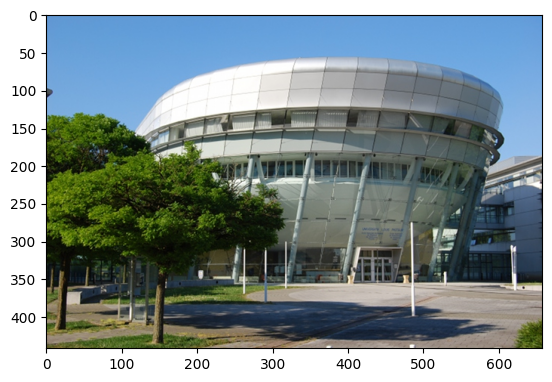

In [181]:
import torchvision.transforms.functional as TF
from torchvision.transforms import ToTensor, ToPILImage, Grayscale, Compose, RandomRotation
icube_tensor = ToTensor()(icube_img.copy())

# display the tensor image
plt.imshow(ToPILImage()(icube_tensor))
plt.show()

<br><br>**Image processing**

We have learnt how to manipulate images in the class. Let's practice here.
    
 - img  = Read the image of flower
 - img1 = Rotate by 90 degrees
 - img2 = transpose image
 - img3 = flip vertically
 - img4 = resize (shrink) 10 times smaller than original size
 - img5 = crop 30% of the center
 - img6 = Can you crop exactly only the flower? using `tf.image.crop_to_bounding_box?` (_Do only 3 trials and proceed to next task_)

In [182]:
img = plt.imread(filepath+"flower.jpg")

# convert to tensor variable
img = ToTensor()(img)
print("Image shape = ",img.shape)

# rotate
img1 = TF.rotate(img, angle=75)

# Transpose
img2 = TF.vflip(TF.hflip(img))

# Vertical flipping
img3 = TF.vflip(img)

# shrink img x 10
img4 = TF.resize(img, (43, 78))

# Crop 30% in the middle
img5 = TF.center_crop(img, 100)


Image shape =  torch.Size([3, 177, 284])


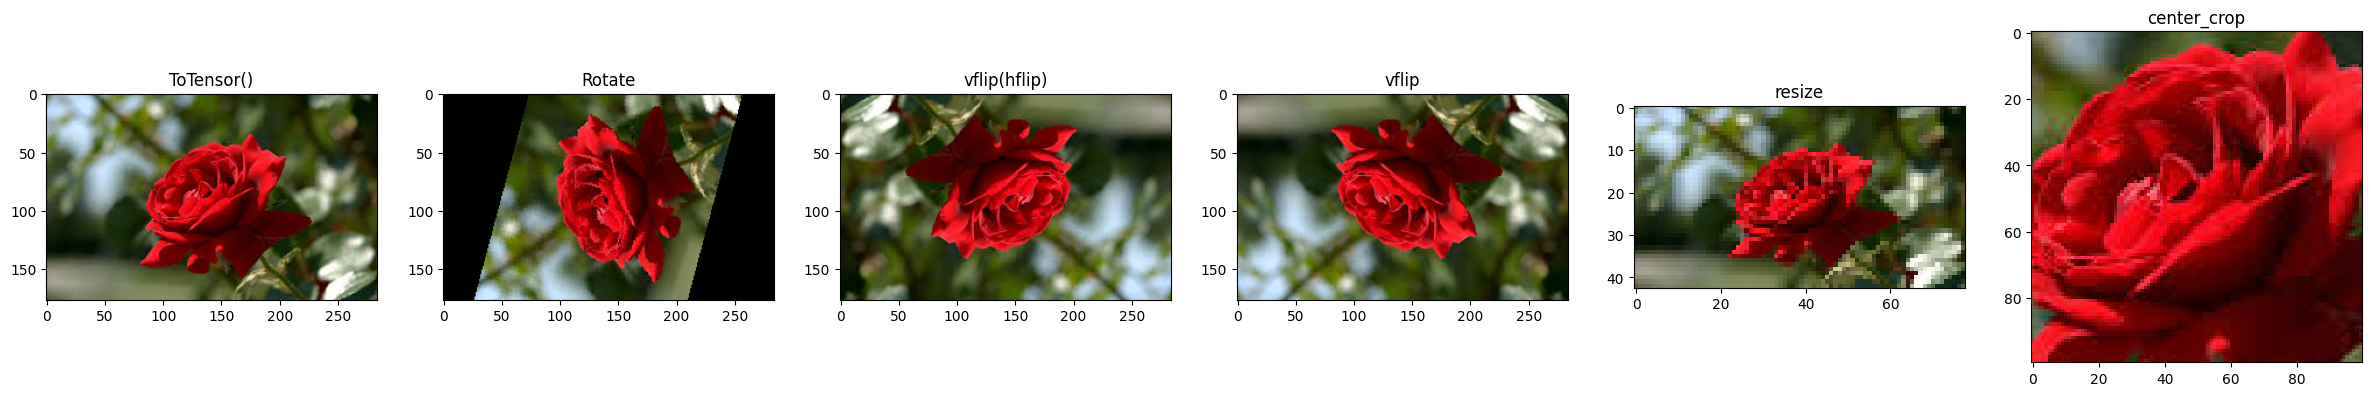

In [183]:
# plot the images
fig = plt.figure(figsize=(35,7))
fig.add_subplot(1, 7, 1); plt.imshow(ToPILImage()(img)) ; plt.title('ToTensor()')
fig.add_subplot(1, 7, 2); plt.imshow(ToPILImage()(img1)); plt.title('Rotate')
fig.add_subplot(1, 7, 3); plt.imshow(ToPILImage()(img2)); plt.title('vflip(hflip)')
fig.add_subplot(1, 7, 4); plt.imshow(ToPILImage()(img3)); plt.title('vflip')
fig.add_subplot(1, 7, 5); plt.imshow(ToPILImage()(img4)); plt.title('resize')
fig.add_subplot(1, 7, 6); plt.imshow(ToPILImage()(img5)); plt.title('center_crop')
plt.show()

#### <font color=red><br><br><u><b>TODO</b></u> 4:</font>

- Read and display the image of petite-france.jpg
- Transform it to a grayscale image ( PS: to display, slice the channel as img[:, :, 0] )
- Add the brightness


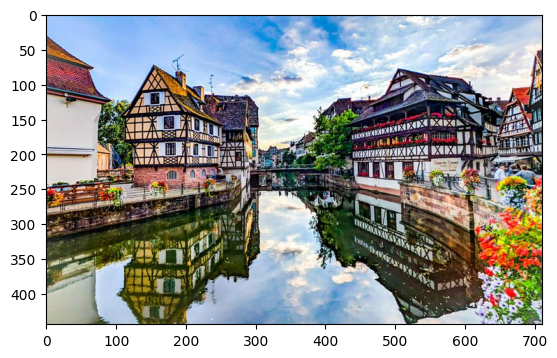

In [184]:
# Read and display image : petite-france.jpg
img = plt.imread(filepath + 'petite-france.jpg')
img = ToTensor()(img)

plt.figure()
plt.imshow(ToPILImage()(img))
plt.show()

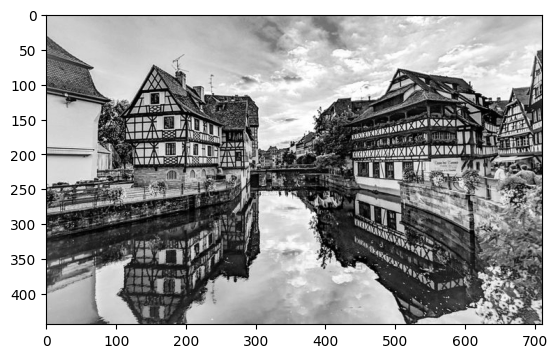

In [185]:
# convert to grayscale
img_g = torch.mean(img, dim=0)

# display grayscale image

plt.figure()
plt.imshow(ToPILImage()(img_g), cmap='gray')
plt.show()

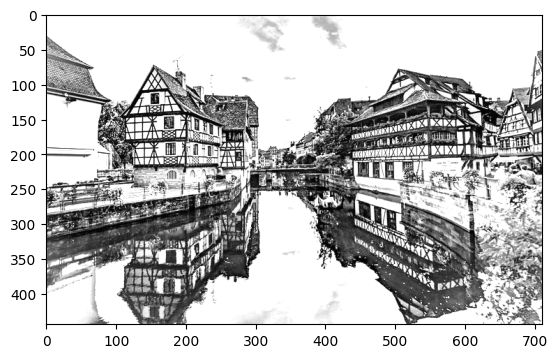

In [186]:
# adjust image brightness
img_gb = TF.adjust_brightness(img_g, 1.6)

# display brightened image
plt.figure()
plt.imshow(ToPILImage()(img_gb), cmap='gray')
plt.show()

<br>
<br>
<br><hr />

## Part 5: Dataset and input pipeline

<img src="https://storage.googleapis.com/jalammar-ml/tf.data/images/tf.data.png" width="500" height="120"  style="margin-right: 100px" align="left"/>

**Objectives**:

- 1) To build a simple dataset.
- 2) To build an image dataset.
- 3) To perform basic dataset operations.
- 4) To build PyTorch dataset input pipeline for deep learning models.

<br><br>**Simple dataset**

- Generate a dataset of sequential numbers
- access the items in the dataset

In [187]:
# Make a dataset of few numbers
dataset = torch.arange(10)

# Check the contents of the dataset:
print(dataset)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [188]:
# Repeat the dataset 3x
repeated_dataset = dataset.repeat(3)

# display
print(repeated_dataset)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9])


In [189]:
# Make a sub dataset (front)
new_dataset = dataset[0:3]

# display
print(new_dataset)

tensor([0, 1, 2])


In [190]:
# we can iterate and read the dataset one-by-one
it = iter(dataset)

In [191]:
# print one by one.
print(next(it).numpy())
print(next(it).numpy())
print(next(it).numpy())

0
1
2


<br><br>**Image dataset**

- We have downloaded a cat and dog dataset.
- Let's transform the data to a PyTorch dataset.

In [192]:
# # The cat & dog dataset (https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1)
# f = gzip.open('/content/drive/MyDrive/datasets/td_catsdogs2000_u8.pkl.gz', 'rb')
# cat_dog_dataset = pickle.load(f,encoding='bytes')

# print(cat_dog_dataset[0].shape)
# print(cat_dog_dataset[1].shape)
# f.close()

In [193]:
# # Check some images and labels
# img_idx = (30, 75, 1500, 895)
# for i, idx in enumerate(img_idx):
#     plt.subplot(1,len(img_idx),i+1)
#     plt.imshow(cat_dog_dataset[0][idx])
#     plt.title(cat_dog_dataset[1][idx])

In [194]:
# #Recovers the cats & dogs images from the gzip file
# #and creates train and test subfolders
from PIL import Image
import pandas as pd 

# os.makedirs('dataset/td_catsdogs2000/train/')
# os.makedirs('dataset/td_catsdogs2000/test/')
# train_split = 0.8
# train_samp = np.round(cat_dog_dataset[0].shape[0]*train_split)

# for idx in np.arange(cat_dog_dataset[0].shape[0]): 
#     im = Image.fromarray(cat_dog_dataset[0][idx])
#     label = cat_dog_dataset[1][idx]
#     if label == 0:
#         im_label = 'cat'
#     else:
#         im_label = 'dog'    
#     if idx <= train_samp : 
#         destdir = 'train'
#     else:
#         destdir = 'test'
#     im.save("dataset/td_catsdogs2000/{}/{}_{}.png".format(destdir,im_label,idx))

# print('Images treatment done')

In [195]:
#Creates the cvs files for the train and test datasets

# train_df = pd.DataFrame(columns=['img_name', 'label'])
# test_df = pd.DataFrame(columns=['img_name', 'label'])
# train_df['img_name'] = os.listdir('dataset/td_catsdogs2000/train/')
# test_df['img_name'] =  os.listdir('dataset/td_catsdogs2000/test/')

# for idx, i in enumerate(os.listdir("dataset/td_catsdogs2000/train/")): 
#     if 'cat' in i : 
#         label = 0
#     else :
#         label = 1
#     train_df['label'][idx] = label
# for idx, i in enumerate(os.listdir('dataset/td_catsdogs2000/test/')):
#     if 'cat' in i : 
#         label = 0
#     else :
#         label = 1
#     train_df['label'][idx] = label 

# train_df.to_csv(r'train_csv.csv', index=False, header=True)
# test_df.to_csv(r'test_csv.csv', index=False, header=True)    
    
# print('Done')

In [202]:
# Create custom dataset
from torch.utils.data import Dataset

class CatsDogsDataset(Dataset):
    """Cats and Dogs dataset."""

    def __init__(self, root_dir, annotation_file, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            annotation_file : cvs file with the image names & the labels 
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
    #TODO
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform

    def __len__(self):
    #TODO
        return len(self.annotations)
    def __getitem__(self, idx):
    #TODO
        image_id, y_label = self.annotations.iloc[idx]
        img = Image.open(os.path.join(self.root_dir, image_id)).convert('RGB')
        y_label = torch.tensor(y_label)

        if self.transform is not None:
            img = self.transform(img)

        return img, y_label

<br><br>**PyTorch dataset input pipeline**

- Let prepare an PyTorch input pipeline with the train dataset
- Iteratively read the image and labels as needed by deep learning model

In [203]:
#create a trasnformation pipeline (at least to create a torch.tensor from image + one random transformation)
#TODO

MyPipeline = Compose([
    ToTensor(),
    RandomRotation(180),
])

# create train & test datasets (display the number of elements in each dataset)
#TODO
train_dataset = CatsDogsDataset("./dataset/td_catsdogs2000/train/", "train_csv.csv", MyPipeline)
test_dataset = CatsDogsDataset("./dataset/td_catsdogs2000/test/", "test_csv.csv", ToTensor())
print("Number of samples in train dataset : {} ".format(train_dataset.__len__()))
print("Number of samples in test dataset : {} ".format(test_dataset.__len__()))


Number of samples in train dataset : 1601 
Number of samples in test dataset : 399 


<Figure size 640x480 with 0 Axes>

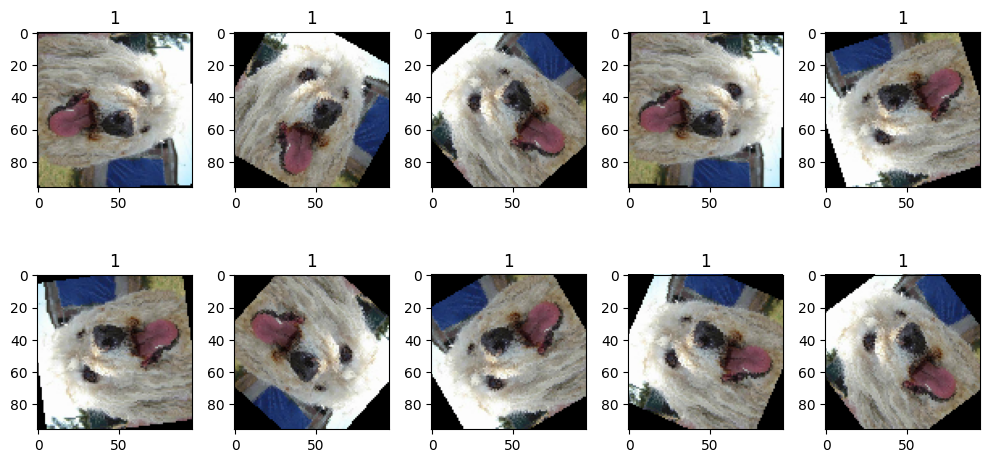

<Figure size 640x480 with 0 Axes>

In [212]:
# Display a random train image multiple time (each time with the same image)
#TODO
fig, axs = plt.subplots(2,5, figsize=(10,5))
axs = axs.flatten()
sample_idx = np.random.randint(0, len(train_dataset))
for ax in axs:
    img, label = train_dataset[sample_idx]
    ax.imshow(ToPILImage()(img)), ax.set_title(label.item())

plt.tight_layout()
plt.figure()

<br><br><hr />
# Bonus Exercises
You can complete the following bonus exercises to better understand the concepts. 


<hr />

### **Bonus 1:**
<hr />
 
<font color=red> 

[comment]: <> (<img src="notebook_images/todo_ops.jpg"/>)
![alt text](https://drive.google.com/uc?id=137e0qQpty0PF7LlBiaQEOgxhWbktL1j0)

Following the activities in the figure:
    
- a = using `torch.arange` generate tensors from 0... 23.
- b = using `torch.reshape` reshape it to a 4 x 6 tensor as shown
- c = slice the upper part
- d = slice the lower part
- e = using `torch.concat` along `axis=1` to join the two slices as shown
- f = figure out and code the operation going on in the axis=1
- g = figure out and code the operation going on in the axis=0
    
</font>

In [ ]:
# TODO (print every step)

<br>
<hr />


### **Bonus 2:**
<hr />

- A. Given the function :
### $f = -3x^3 + 2x^2 - x + \frac{1}{2}\sqrt{x}$
    - Find the derivative  $ \frac{df}{dx} $ and solve for $x=3.7$.
    
</font>

In [ ]:
# Bonus 2:

<br>
<hr />

### **Bonus 3:**
<hr />

<font color=red> 

- Generate a 2D 9x9 tensor with random values.
- Normalize the tensor such that the values of each row sums to 1.
- Show that they actually sum to 1.
    
</font>

In [ ]:
# Bonus 3 

<hr />

### **Bonus 4:**
<hr />

[comment]: <> (<img src="notebook_images/ff1.jpg"/>)
![alt text](https://drive.google.com/uc?id=1MFsndZAPpsgu8iW6kO3KEiVEvON0jJR5)

As shown in the figure beside:
- Given a 2D 3x5 tensor with int values.
- Slice the tensor to have a new tensor consisting of ONLY the 1st, 3rd and 5th columns of the tensor.
    
</font>

In [ ]:
# Bonus 4 :

<hr />

### **Bonus 5:**
<hr />

<font color=red> 

- Read the image of the car (dataset/sample_images/car.jpg)
- Augment it to have 5 different images; you can use rotation, transpose, vertical and horizontal flipping, resize

    
</font>

In [ ]:
# Bonus 6:

<hr /><hr />

### <font color=green> Congratulations!! this is end of first part </font> 